In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Company Stock and Investment.csv',index_col='Date',parse_dates=True)
df=df.dropna()
print('Shape of data',df.shape)
df.head()

Shape of data (1984, 4)


,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
Date,,,,
2009-12-31,0.025417,0.000150,0.017354,0.006848
2010-04-01,0.026830,0.001097,0.015565,-0.004609
2010-05-01,0.002699,0.001560,0.001729,0.005900
2010-06-01,0.021688,0.006009,-0.015906,-0.018116
2010-07-01,-0.006256,0.000221,-0.001849,-0.017013


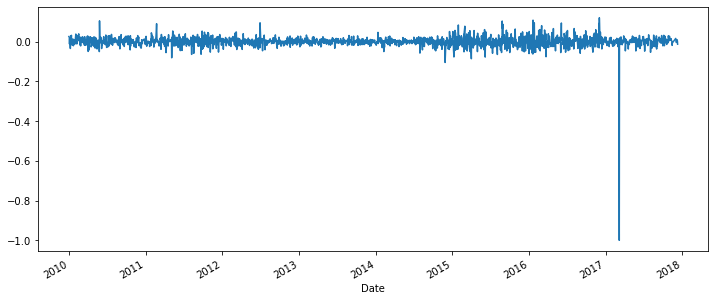

In [3]:
df['Oil Investments'].plot(figsize=(12,5))

In [4]:
df['Oil Investments'].describe()

count    1984.000000
mean       -0.000435
std         0.030869
min        -1.000000
25%        -0.011021
50%         0.000277
75%         0.010734
max         0.119511
Name: Oil Investments, dtype: float64

In [5]:
from statsmodels.tsa.stattools import adfuller

In [6]:
#Lets create a function to check stationary condition
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [7]:
adfuller_test(df['Oil Investments'])

ADF Test Statistic : -45.94216292983992
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 1983
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [8]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

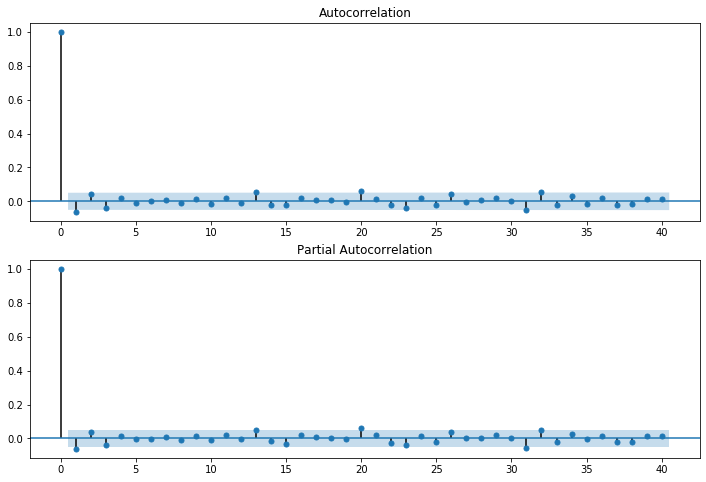

In [9]:
#Lets plot acf and pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Oil Investments'].iloc[:1511],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Oil Investments'].iloc[:1511],lags=40,ax=ax2)

In [10]:
# we can see that current value of oil investment has negligble auto correlation AND partial auto correlation with lags
#p=0, d=0, q=0 
from statsmodels.tsa.arima_model import ARIMA

In [11]:
#split the data into train and test
train=df['Oil Investments'].iloc[:1511]
test=df['Oil Investments'].iloc[1511:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(1511,) (473,)
-0.008618368000000001 -0.0070055690000000006


In [12]:
#Train the Model
from statsmodels.tsa.arima_model import ARIMA
model1=ARIMA(train,order=(0,0,0))
model1=model1.fit()
model1.summary()

C:\Users\acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:        Oil Investments   No. Observations:                 1511
Model:                     ARMA(0, 0)   Log Likelihood                3780.419
Method:                           css   S.D. of innovations              0.020
Date:                Fri, 23 Oct 2020   AIC                          -7556.838
Time:                        22:39:20   BIC                          -7546.197
Sample:                             0   HQIC                         -7552.875
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.001     -0.555      0.579      -0.001       0.001
==============================================================================
"""

In [13]:
print(len(train))
print(len(test))

1511
473


In [14]:
pred1=model1.predict(start=1511,end=1511+473,typ='levels').rename('ARIMA predictions')

C:\Users\acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


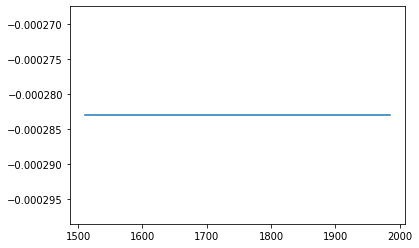

In [15]:
pred1.plot()


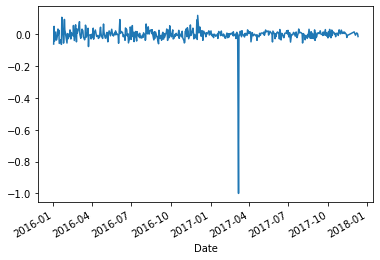

In [16]:
test.plot()

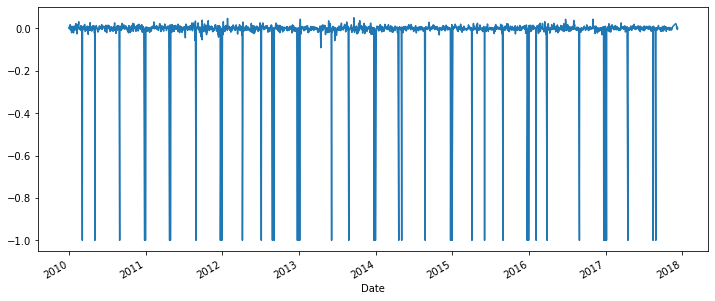

In [17]:
df['Gold Investments'].plot(figsize=(12,5))

In [18]:
#let us see the stats of data
df['Gold Investments'].describe()

count    1984.000000
mean       -0.020152
std         0.140965
min        -1.000000
25%        -0.005881
50%         0.000000
75%         0.005454
max         0.049577
Name: Gold Investments, dtype: float64

In [19]:
#checking the stationarity of data
adfuller_test(df['Gold Investments'])

ADF Test Statistic : -15.906853851669043
p-value : 8.208405770369246e-29
#Lags Used : 7
Number of Observations Used : 1976
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


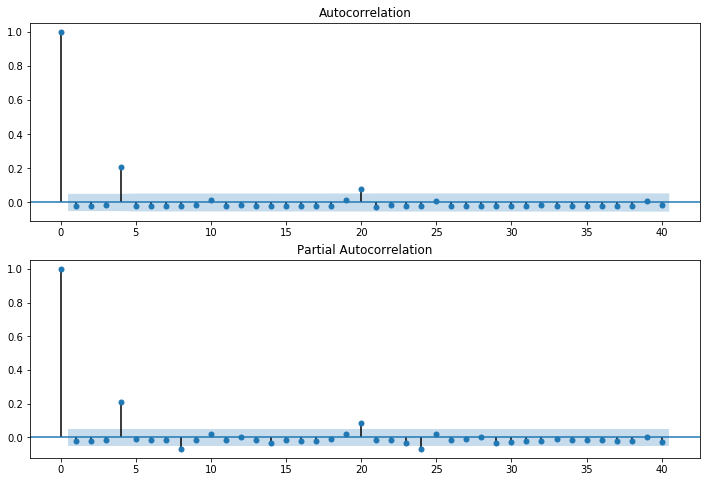

In [20]:
#lets plot the acf and pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Gold Investments'].iloc[:1511],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Gold Investments'].iloc[:1511],lags=40,ax=ax2)

In [21]:
#Again  there is negligble auto and partial correlation with lags
#hence p =0, d = 0 and q =0

In [22]:
#split the data into train and test
train=df['Gold Investments'].iloc[:1511]
test=df['Gold Investments'].iloc[1511:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(1511,) (473,)
0.0 0.005962655


In [23]:
#Train the Model
from statsmodels.tsa.arima_model import ARIMA
model2=ARIMA(train,order=(0,0,0))
model2=model2.fit()
model2.summary()

C:\Users\acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:       Gold Investments   No. Observations:                 1511
Model:                     ARMA(0, 0)   Log Likelihood                 803.792
Method:                           css   S.D. of innovations              0.142
Date:                Fri, 23 Oct 2020   AIC                          -1603.584
Time:                        22:39:22   BIC                          -1592.943
Sample:                             0   HQIC                         -1599.622
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0206      0.004     -5.637      0.000      -0.028      -0.013
==============================================================================
"""

In [24]:
pred2=model2.predict(start=1511,end=1511+473,typ='levels').rename('ARIMA predictions')

C:\Users\acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


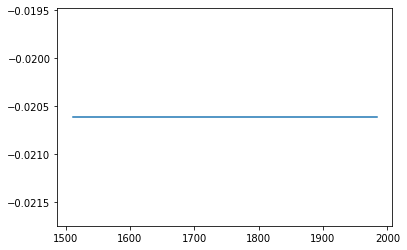

In [25]:
pred2.plot()

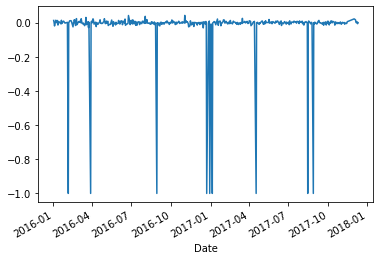

In [26]:
test.plot()

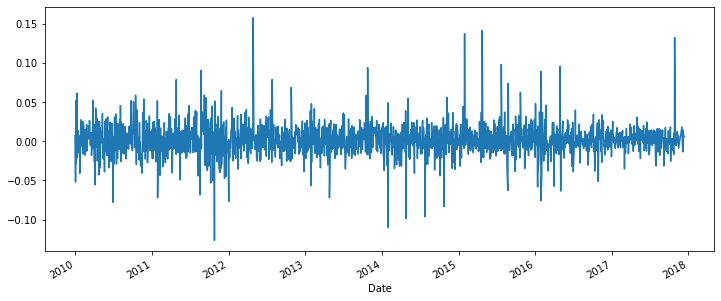

In [27]:
df['Other sharesInvestments'].plot(figsize=(12,5))

In [28]:
df['Other sharesInvestments'].describe()

count    1984.000000
mean        0.001269
std         0.019733
min        -0.126568
25%        -0.008492
50%         0.000840
75%         0.011632
max         0.157457
Name: Other sharesInvestments, dtype: float64

In [29]:
adfuller_test(df['Other sharesInvestments'])

ADF Test Statistic : -44.84814456404393
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 1983
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


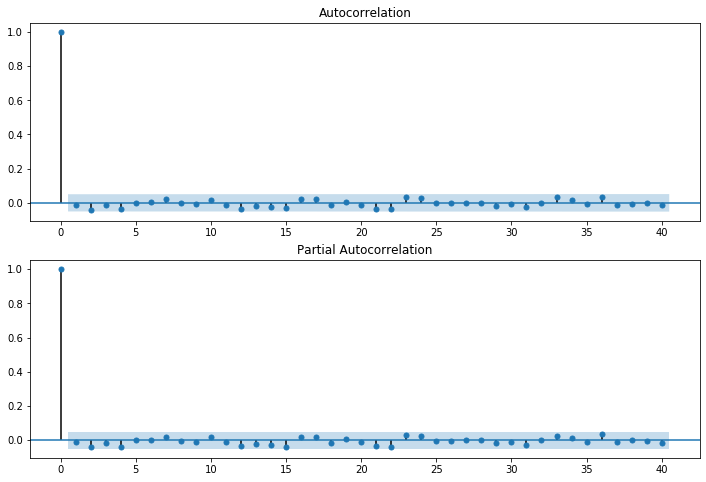

In [30]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Other sharesInvestments'].iloc[:1511],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Other sharesInvestments'].iloc[:1511],lags=40,ax=ax2)

In [31]:
#Again  there is negative auto and partial correlation with lags
#hence p =0, d = 0 and q =0

In [32]:
#split the data into train and test
train=df['Other sharesInvestments'].iloc[:1511]
test=df['Other sharesInvestments'].iloc[1511:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(1511,) (473,)
-0.05755378 -0.00892828


In [33]:
model3=ARIMA(train,order=(0,0,0))
model3=model3.fit()
model3.summary()

C:\Users\acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARMA Model Results                                
===================================================================================
Dep. Variable:     Other sharesInvestments   No. Observations:                 1511
Model:                          ARMA(0, 0)   Log Likelihood                3718.947
Method:                                css   S.D. of innovations              0.021
Date:                     Fri, 23 Oct 2020   AIC                          -7433.894
Time:                             22:39:23   BIC                          -7423.253
Sample:                                  0   HQIC                         -7429.931
                                                                                   
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0013      0.001      2.420      0.016       0.000       0.002
==============================================================================
"""

In [34]:
pred3=model3.predict(start=1511,end=1511+473,typ='levels').rename('ARIMA predictions')

C:\Users\acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


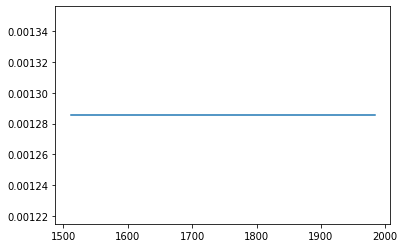

In [35]:
pred3.plot()

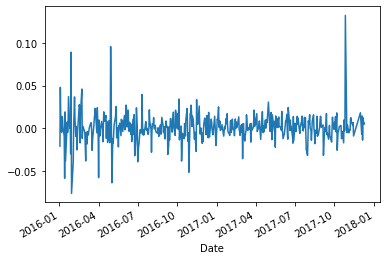

In [36]:
test.plot()